# HDDT Visualisations - CEDA bigraph #

## This project explores 4 of 5 'foundation societies' recognised by RAI, and 1 'origin' society add by me. ##

| Society | abv. | Dates
| --- | --- | --- |
| Quaker Committee on the Aborigines* | QCA | 1832/37 - 1846 |
| Aborigines Protection Society | APS | 1837 - 1919 |
| Ethnological Society of London | ESL | 1843 - 1871 |
| Anthropological Society of London | ASL | 1863 - 1871 |
| Anthropological Institute | AI | 1843 - 1871 |
| London Anthropological Society** | LAS | 1873 - 1874 |

* Origin Society included in this project but not recognised by RAI.
** not included in this project (beyond 1871 cut off date).

In [2]:
import csv
from operator import itemgetter
import networkx as nx
from networkx.algorithms import community #This part of networkx, for community detection, 
#needs to be imported separately.
import nbconvert
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 6)
import seaborn as sn
import numpy as np


# The Centres for the Emergence of the discipline of anthropology (CEDA) in Britian 1830 - 1870 #

<img src="ceda.png">

## The Quaker Committee on the Aborigines (QCA)  1837 -1846 ##

### Because there are only 30 members of the QCA we can iist all of them here ###

The Quaker committee on the Aborigines, was a Quaker Committee of Enquiry. A committee formed by, and exclusively manned by Quakers. It met, performed its enquiries and  reported its findings and recommendations to the Quaker Meetings for Sufferings, the standing committee of London Yearly Meeting which was the National Assembly of Quakers in Britain at the time. The committees remit, rules of engagement and characteristics woiuld have been agreed by the national assembly and the committee would no doubt have reported in the manner of Friends. The committee was formed to explore and take up a ‘concern’ amongst Quakers, initially to consider promoting the Gospel amongst the aborigines in 1832 (prompted by similar actions popular at the time among other evangelical churches). But it changed its remit in 1837 to instead take up a philanthropic concern deriving from the group’s increasing awareness through its activities of the plight of aborigines. Therefore, what began as a Quaker Committee of Enquiry to consider promoting the Gospel to Aborigines, soon transformed into the Quaker Committee on the Aborigines, concerned with the plight of the aborigines throughout the colonies, and it’s relief.

In [3]:
qca = pd.read_csv ('vw_4_quaker_nodes_QCA_202108251635.csv')
qca['birth_year'] = qca ['birth_year'].fillna(0).astype(np.int64)
qca['death_year'] = qca['death_year'].fillna(0).astype(np.int64)
#quaker_qca.info ()

In [4]:
qca

,Name,birth_year,death_year,religion_name,ceda_name,person_ceda_first_year,person_ceda_last_year
0,Thomas (1) Hodgkin,1798,1866,Quaker,QCA,1839,1847
1,James Bowden,0,0,Quaker,QCA,1842,1847
2,William Nash,0,0,Quaker,QCA,1842,1847
3,Joseph Sturge,0,0,Quaker,QCA,1842,1847
4,William Jun Grimshaw,0,0,Quaker,QCA,1840,1847
5,Henry Knight,0,0,Quaker,QCA,1840,1847
6,Edward Paull,0,0,Quaker,QCA,1840,1847
7,Robert Jun Alsop,0,0,Quaker,QCA,1837,1847
8,Abram Rawlinson Barclay,0,0,Quaker,QCA,1837,1839
9,John Barclay,0,0,Quaker,QCA,1837,1839


We can plot the number of joiners in each year. New members joined only in the years 1837, 1839, 1840 and 1842. We know that the QCA was established in 1837, so there were only three years when new members joined.

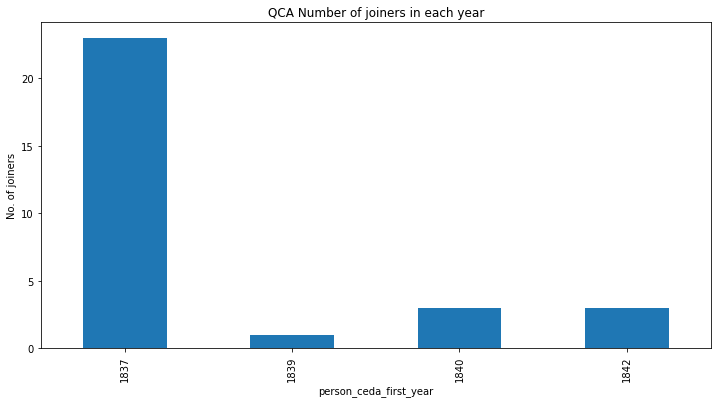

In [5]:
qca.groupby('person_ceda_first_year')['Name'].nunique().plot(kind='bar')
plt.title ("QCA Number of joiners in each year")
plt.ylabel ("No. of joiners")
plt.show()

Because new members group in specific years, we chart the number of leavers in each year. Members left in 1839, 1842 1nd 1847. we know that the QCA was 'laid down' (disbanded) in 1847 which leaves only two years when members left the committee.

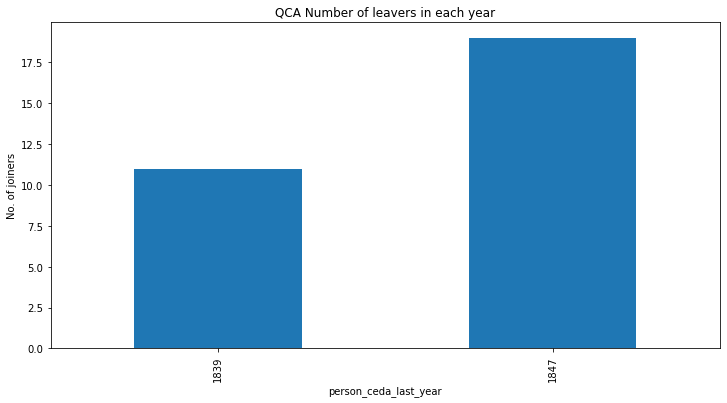

In [6]:
qca.groupby('person_ceda_last_year')['Name'].nunique().plot(kind='bar')
plt.title ("QCA Number of leavers in each year")
plt.ylabel ("No. of joiners")
plt.show()

We can elsewhere investigate why in 1839, 11 members left and 1 joined (Thomas Hodgkin). 3 more joined in each of 1840 and 1842.

In [7]:
qca[(qca['person_ceda_first_year'] == 1837) & (qca['person_ceda_last_year'] == 1847)]

,Name,birth_year,death_year,religion_name,ceda_name,person_ceda_first_year,person_ceda_last_year
7,Robert Jun Alsop,0,0,Quaker,QCA,1837,1847
11,John Thomas Barry,0,0,Quaker,QCA,1837,1847
12,Peter Bedford,0,0,Quaker,QCA,1837,1847
16,Josiah Forster,0,0,Quaker,QCA,1837,1847
17,Robert Forster,0,0,Quaker,QCA,1837,1847
18,William Forster,0,0,Quaker,QCA,1837,1847
19,Joseph Talwin Foster,0,0,Quaker,QCA,1837,1847
21,Edwd Harris,0,0,Quaker,QCA,1837,1847
25,Joseph Neatby,0,0,Quaker,QCA,1837,1847
26,John Sanderson,0,0,Quaker,QCA,1837,1847


12 of the original members were members throughout the life of the committee. In any year the majority of members were 'permanent' members.

## The Aborigines Protection Society (APS) 1837 -1919 ##

The database contains the names of 1171 members of the APS from its foundation in 1838 to 1871 when it merged with Anti-Slavery International. 571 members (49%) are Quaker. 

The Aborigines Protection Society was a secular pressure group that lobbied the Colonial Office and Parliament for the relief of the plight of aborigines throughout the British Settlements. It had a mixed Quaker and non-Quaker executive, membership and subscription lists (it was in large part drawn from the Quaker Committee on the Aborigines), and Quakers dominated the agenda and publishing and lobbying activities of the society for at least the first 30 years of the Society’s life. The Society met, performed its enquiries and reported its findings and recommendations to the Society’s members according to its own constitution (it usually met monthly). The Society’s remit, rules of engagement and characteristics were similar to those of the many other secular lobbying and public opinion forming societies of the time.

In [8]:
aps = pd.read_csv ('vw_4_ceda_aps_quakers_202108251548.csv')
aps['birth_year'] = aps ['birth_year'].fillna(0).astype(np.int64)
aps['death_year'] = aps['death_year'].fillna(0).astype(np.int64)
aps['religion_id'] = aps['religion_id'].fillna(0).astype(np.int64)
aps.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1171 entries, 0 to 1170
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         1171 non-null   object
 1   birth_year   1171 non-null   int64 
 2   death_year   1171 non-null   int64 
 3   first_year   1171 non-null   int64 
 4   last_year    1171 non-null   int64 
 5   religion_id  1171 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 55.0+ KB


In [9]:
aps

,Name,birth_year,death_year,first_year,last_year,religion_id
0,William Aldam,1813,1890,1838,1848,1
1,James Bell,1818,1872,1847,1862,1
2,Henry Christy,1810,1865,1840,1865,1
3,William Clay,1791,1869,1839,1868,1
4,William Spicer Wood,0,1902,1864,1867,1
...,...,...,...,...,...,...
1166,x Wright,0,0,1839,1850,0
1167,W Wrigley,0,0,1861,1862,0
1168,James Yates,0,0,1853,1856,0
1169,John Young,0,0,1840,1840,0


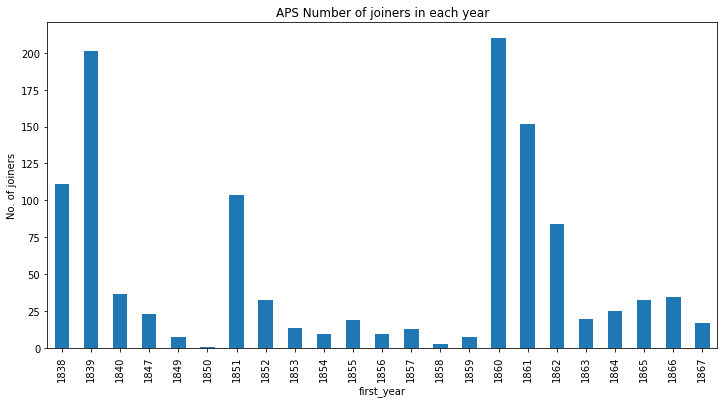

In [10]:
aps.groupby('first_year')['Name'].nunique().plot(kind='bar')
plt.title ("APS Number of joiners in each year")
plt.ylabel ("No. of joiners")
plt.show()

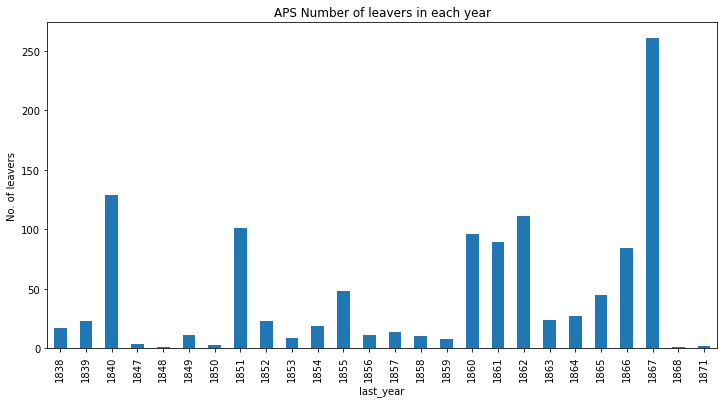

In [11]:
aps.groupby('last_year')['Name'].nunique().plot(kind='bar')
plt.title ("APS Number of leavers in each year")
plt.ylabel ("No. of leavers")
plt.show()

In [12]:
quakers_aps = aps.loc[aps ['religion_id'] == 1,:]
quakers_aps

,Name,birth_year,death_year,first_year,last_year,religion_id
0,William Aldam,1813,1890,1838,1848,1
1,James Bell,1818,1872,1847,1862,1
2,Henry Christy,1810,1865,1840,1865,1
3,William Clay,1791,1869,1839,1868,1
4,William Spicer Wood,0,1902,1864,1867,1
...,...,...,...,...,...,...
572,Joshua Wilson,0,0,1860,1860,1
573,F Woodhead,0,0,1861,1862,1
574,W Woolston,0,0,1861,1861,1
575,Francis Wright,0,0,1838,1838,1


In [13]:
non_quakers_aps = aps.loc[aps ['religion_id'] != 1,:]
non_quakers_aps

,Name,birth_year,death_year,first_year,last_year,religion_id
577,Samuel C Baker,1821,1893,1839,1871,0
578,John Bell (2),1811,1895,1838,1855,0
579,John Brown,1801,1879,1839,1839,0
580,Thomas junior Christy,0,0,1839,1839,0
581,Richard King,1811,1876,1838,1871,0
...,...,...,...,...,...,...
1166,x Wright,0,0,1839,1850,0
1167,W Wrigley,0,0,1861,1862,0
1168,James Yates,0,0,1853,1856,0
1169,John Young,0,0,1840,1840,0


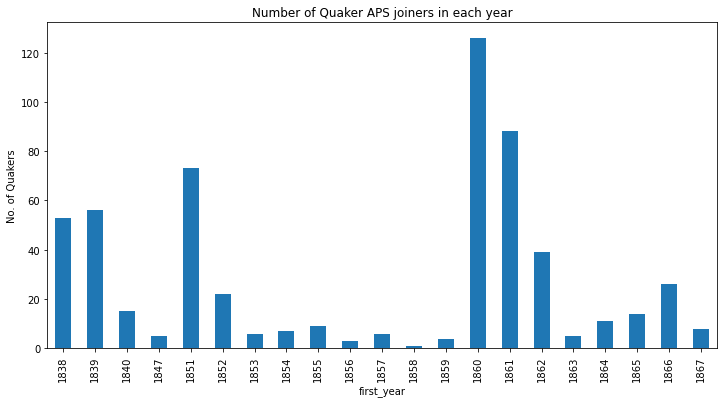

In [14]:
quakers_aps.groupby('first_year')['Name'].nunique().plot(kind='bar')
plt.title ("Number of Quaker APS joiners in each year")
plt.ylabel ("No. of Quakers")
plt.show()

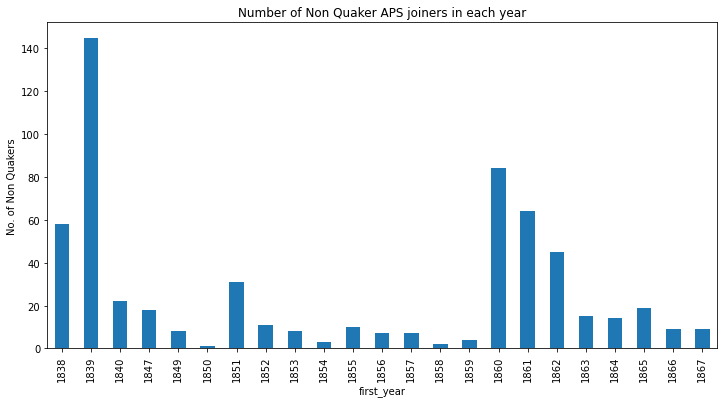

In [15]:
non_quakers_aps.groupby('first_year')['Name'].nunique().plot(kind='bar')
plt.title ("Number of Non Quaker APS joiners in each year")
plt.ylabel ("No. of Non Quakers")
plt.show()

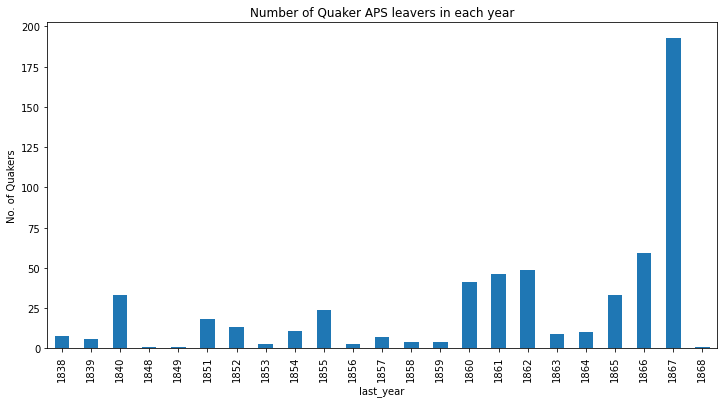

In [16]:
quakers_aps.groupby('last_year')['Name'].nunique().plot(kind='bar')
plt.title ("Number of Quaker APS leavers in each year")
plt.ylabel ("No. of Quakers")
plt.show()

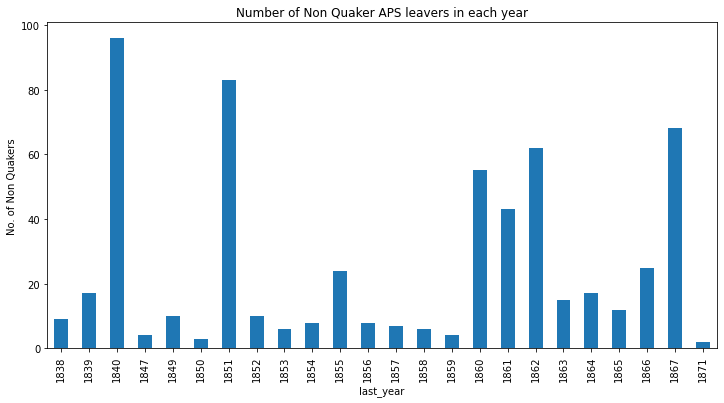

In [17]:
non_quakers_aps.groupby('last_year')['Name'].nunique().plot(kind='bar')
plt.title ("Number of Non Quaker APS leavers in each year")
plt.ylabel ("No. of Non Quakers")
plt.show()

## The Ethnological Society of London (ESL) 1843 - 1871 ##

The Ethnological Society of London was the first intentionally academic society devoted to the discipline of anthropology in Britain. Secular by intent but if not always entirely so in its early years, it sought to be a place where those with a scientific interest in the field of ethnology could commune, share ideas and knowledge, and produce academic reports and hold academic meetings.  It met, performed its enquiries and reported its findings and recommendations to the Society’s members according to its own constitution (it usually met monthly). The Society’s remit, rules of engagement and characteristics were those of the many other scientific societies emerging at the time, its constitution being purposely compliant with BAAS requirements.  

In [18]:
esl = pd.read_csv ('vw_4_ceda_esl_quakers_202108162129.csv')

# code not needed for this set because in this datframe birth_year and death_year show as 'object' and not 'float'
#esl['birth_year'] = esl ['birth_year'].fillna(0).astype(np.int64)
#esl['death_year'] = esl['death_year'].fillna(0).astype(np.int64)
esl['religion_id'] = esl['religion_id'].fillna(0).astype(np.int64)
esl.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         748 non-null    object
 1   birth_year   436 non-null    object
 2   death_year   466 non-null    object
 3   first_year   748 non-null    int64 
 4   last_year    748 non-null    int64 
 5   religion_id  748 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 35.2+ KB


In [19]:
esl

,Name,birth_year,death_year,first_year,last_year,religion_id
0,William Adam,NaN,NaN,1844,1844,0
1,William (1) Adams,NaN,NaN,1844,1844,0
2,William (2) Adams,"1,820","1,900",1858,1871,0
3,Louis Agassiz,"1,807","1,873",1860,1871,0
4,Augustine Aglio,"1,777","1,857",1843,1845,0
...,...,...,...,...,...,...
743,James Wyld,"1,812","1,887",1844,1854,0
744,Ashton Yates,"1,781","1,863",1860,1862,0
745,W Holt Yates,"1,802","1,874",1844,1846,0
746,James Yearsley,"1,805","1,869",1845,1845,0


In [20]:
quakers_esl = esl.loc[esl ['religion_id'] == 1,:]
quakers_esl

,Name,birth_year,death_year,first_year,last_year,religion_id
8,William Aldam,"1,813","1,890",1844,1848,1
27,Edward Backhouse,"1,808","1,879",1870,1871,1
28,James (1) Backhouse,"1,794","1,869",1869,1869,1
48,James Bell,"1,818","1,872",1852,1862,1
123,Henry Christy,"1,810","1,865",1854,1865,1
132,William Clay,"1,791","1,869",1861,1868,1
140,x Collier,NaN,NaN,1844,1844,1
161,David Dale,"1,829","1,906",1860,1863,1
231,Robert Nicholas Fowler,"1,828","1,891",1851,1871,1
232,William Fowler,NaN,NaN,1851,1851,1


In [21]:
non_quakers_esl = esl.loc[esl ['religion_id'] != 1,:]
non_quakers_esl

,Name,birth_year,death_year,first_year,last_year,religion_id
0,William Adam,NaN,NaN,1844,1844,0
1,William (1) Adams,NaN,NaN,1844,1844,0
2,William (2) Adams,"1,820","1,900",1858,1871,0
3,Louis Agassiz,"1,807","1,873",1860,1871,0
4,Augustine Aglio,"1,777","1,857",1843,1845,0
...,...,...,...,...,...,...
743,James Wyld,"1,812","1,887",1844,1854,0
744,Ashton Yates,"1,781","1,863",1860,1862,0
745,W Holt Yates,"1,802","1,874",1844,1846,0
746,James Yearsley,"1,805","1,869",1845,1845,0


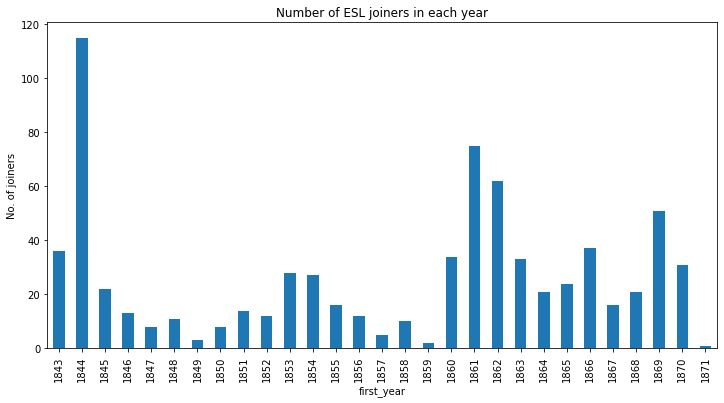

In [22]:
esl.groupby('first_year')['Name'].nunique().plot(kind='bar')
plt.title ("Number of ESL joiners in each year")
plt.ylabel ("No. of joiners")
plt.show()

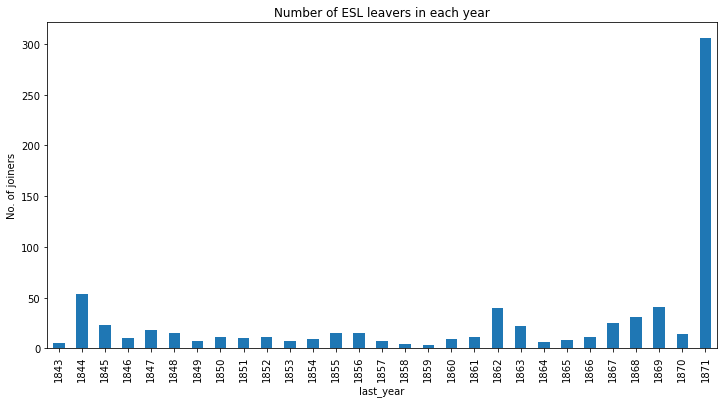

In [23]:
esl.groupby('last_year')['Name'].nunique().plot(kind='bar')
plt.title ("Number of ESL leavers in each year")
plt.ylabel ("No. of joiners")
plt.show()

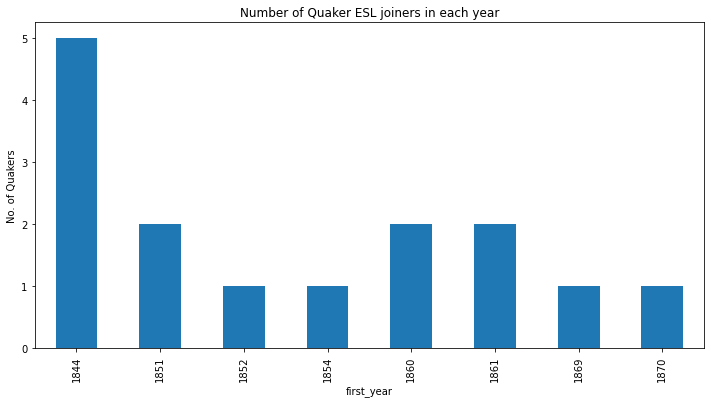

In [24]:
quakers_esl.groupby('first_year')['Name'].nunique().plot(kind='bar')
plt.title ("Number of Quaker ESL joiners in each year")
plt.ylabel ("No. of Quakers")
plt.show()

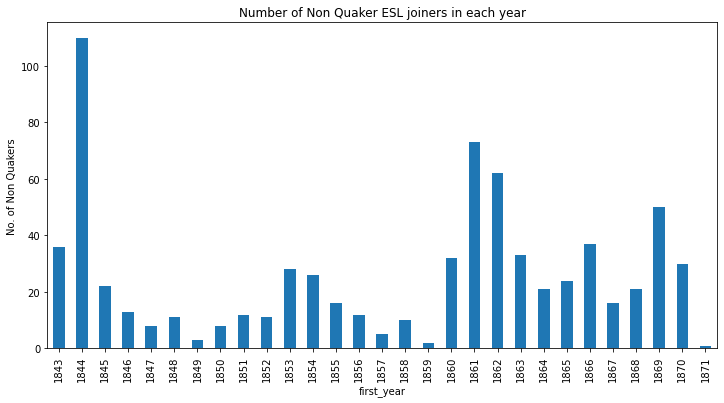

In [25]:
non_quakers_esl.groupby('first_year')['Name'].nunique().plot(kind='bar')
plt.title ("Number of Non Quaker ESL joiners in each year")
plt.ylabel ("No. of Non Quakers")
plt.show()

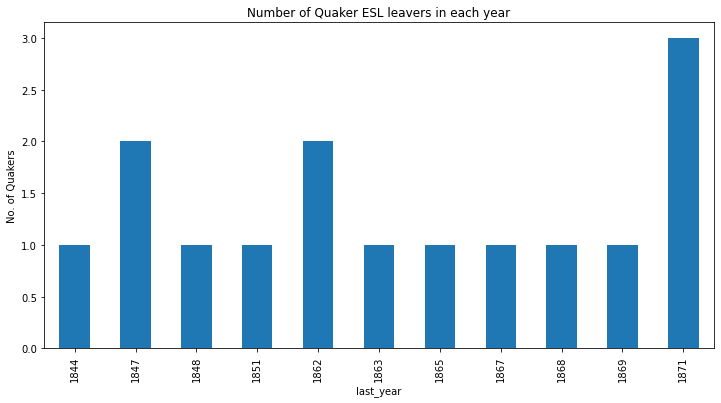

In [26]:
quakers_esl.groupby('last_year')['Name'].nunique().plot(kind='bar')
plt.title ("Number of Quaker ESL leavers in each year")
plt.ylabel ("No. of Quakers")
plt.show()

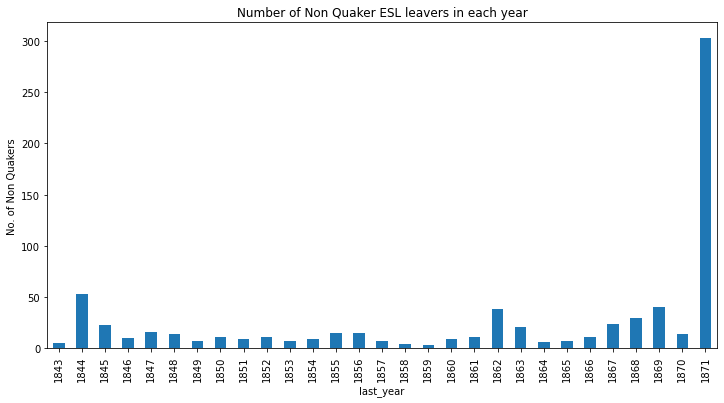

In [27]:
non_quakers_esl.groupby('last_year')['Name'].nunique().plot(kind='bar')
plt.title ("Number of Non Quaker ESL leavers in each year")
plt.ylabel ("No. of Non Quakers")
plt.show()

## The Anthropological Society of London (ASL) 1863 - 1871 ##

In [28]:
asl = pd.read_csv ('vw_4_ceda_asl_quakers_202108162129.csv')
asl['birth_year'] = asl ['birth_year'].fillna(0).astype(np.int64)
asl['death_year'] = asl['death_year'].fillna(0).astype(np.int64)
asl['religion_id'] = asl['religion_id'].fillna(0).astype(np.int64)

In [29]:
asl.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1334 entries, 0 to 1333
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         1334 non-null   object
 1   birth_year   1334 non-null   int64 
 2   death_year   1334 non-null   int64 
 3   first_year   1334 non-null   int64 
 4   last_year    1334 non-null   int64 
 5   religion_id  1334 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 62.7+ KB


In [30]:
asl

,Name,birth_year,death_year,first_year,last_year,religion_id
0,Arthur William A Beckett,1844,1909,1864,1867,0
1,Andrew Mercer Adam,0,0,1865,1867,0
2,H R Adam,0,0,1870,1871,0
3,Henry John Adams,0,0,1864,1869,0
4,William Adlam,0,0,1863,1866,0
...,...,...,...,...,...,...
1329,Stephen Yeldham,1810,1896,1866,1869,0
1330,James A Youl,1811,1904,1864,1865,0
1331,Robert Younge,1801,1874,1865,1871,0
1332,Arthur de Zeltner,0,0,1866,1871,0


In [31]:
quakers_asl = asl.loc[asl ['religion_id'] == 1,:]
quakers_asl

,Name,birth_year,death_year,first_year,last_year,religion_id
12,S Stafford Allen,1840,1870,1863,1870,1
126,Antonio Brady,1811,1881,1864,1871,1
159,William Bull,1828,1902,1867,1871,1
172,Charles Buxton,1823,1871,1864,1866,1
288,Henry Crowley,0,1887,1864,1871,1
340,James T J Doyle,0,0,1865,1868,1
441,George Stacey Gibson,1818,1883,1864,1866,1
560,William Holmes,0,0,1865,1869,1
587,Jonathan Hutchinson,1828,1913,1863,1871,1
1015,J Robinson,0,0,1865,1865,1


In [32]:
non_quakers_asl = asl.loc[asl ['religion_id'] != 1,:]
non_quakers_asl

,Name,birth_year,death_year,first_year,last_year,religion_id
0,Arthur William A Beckett,1844,1909,1864,1867,0
1,Andrew Mercer Adam,0,0,1865,1867,0
2,H R Adam,0,0,1870,1871,0
3,Henry John Adams,0,0,1864,1869,0
4,William Adlam,0,0,1863,1866,0
...,...,...,...,...,...,...
1329,Stephen Yeldham,1810,1896,1866,1869,0
1330,James A Youl,1811,1904,1864,1865,0
1331,Robert Younge,1801,1874,1865,1871,0
1332,Arthur de Zeltner,0,0,1866,1871,0


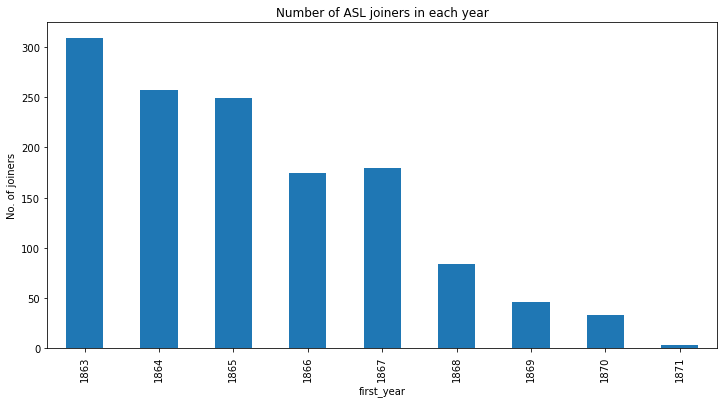

In [33]:
asl.groupby('first_year')['Name'].nunique().plot(kind='bar')
plt.title ("Number of ASL joiners in each year")
plt.ylabel ("No. of joiners")
plt.show()

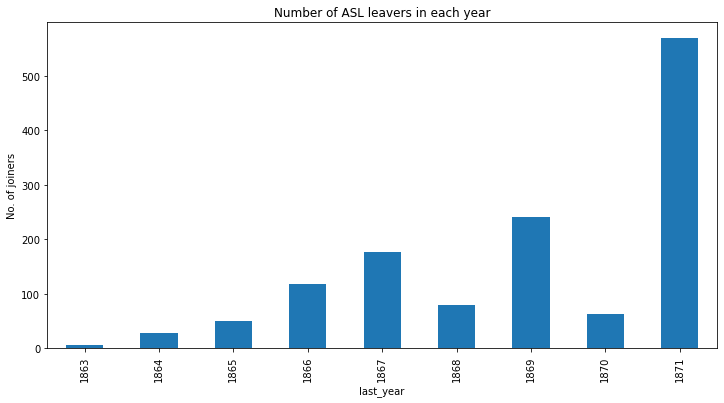

In [34]:
asl.groupby('last_year')['Name'].nunique().plot(kind='bar')
plt.title ("Number of ASL leavers in each year")
plt.ylabel ("No. of joiners")
plt.show()

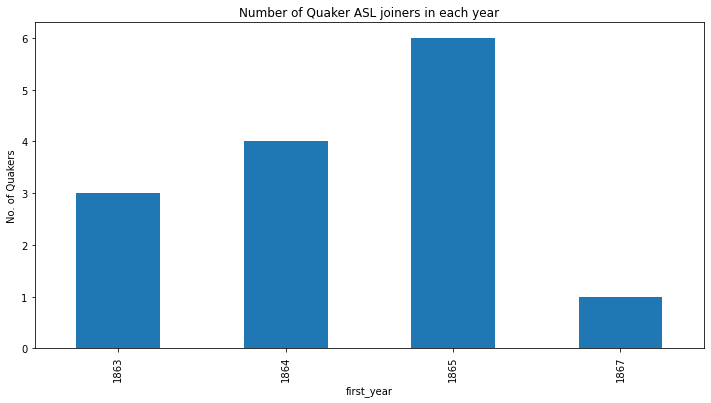

In [35]:
quakers_asl.groupby('first_year')['Name'].nunique().plot(kind='bar')
plt.title ("Number of Quaker ASL joiners in each year")
plt.ylabel ("No. of Quakers")
plt.show()

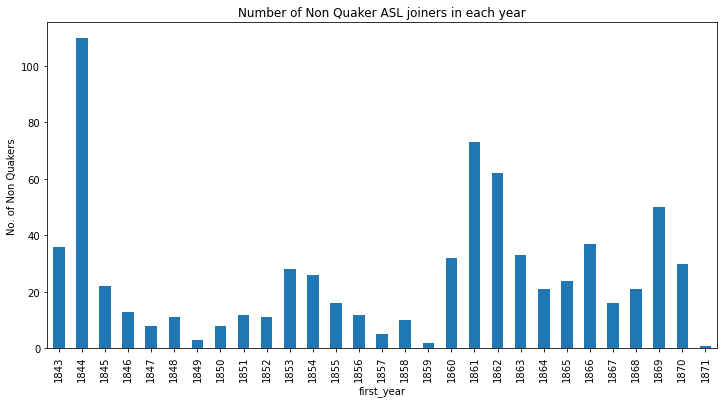

In [36]:
non_quakers_esl.groupby('first_year')['Name'].nunique().plot(kind='bar')
plt.title ("Number of Non Quaker ASL joiners in each year")
plt.ylabel ("No. of Non Quakers")
plt.show()

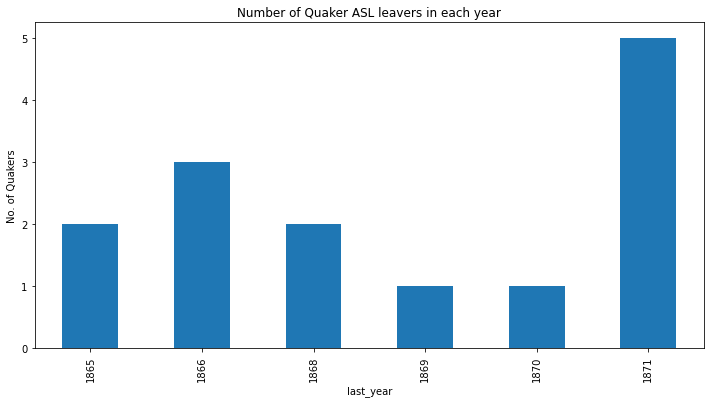

In [37]:
quakers_asl.groupby('last_year')['Name'].nunique().plot(kind='bar')
plt.title ("Number of Quaker ASL leavers in each year")
plt.ylabel ("No. of Quakers")
plt.show()

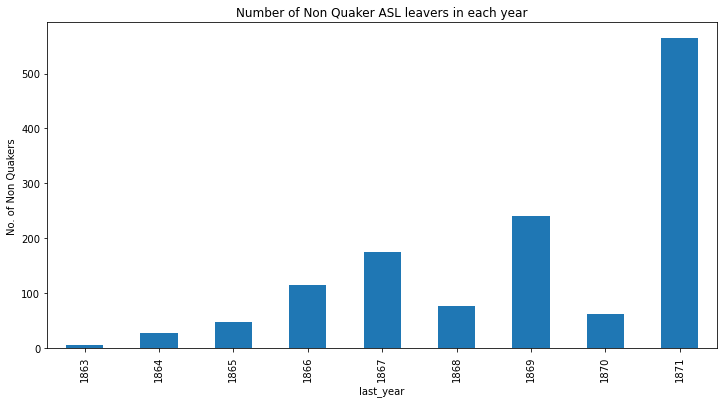

In [38]:
non_quakers_asl.groupby('last_year')['Name'].nunique().plot(kind='bar')
plt.title ("Number of Non Quaker ASL leavers in each year")
plt.ylabel ("No. of Non Quakers")
plt.show()

In [39]:
asl[(asl['first_year'] == 1863) & (asl['last_year'] == 1871)]

,Name,birth_year,death_year,first_year,last_year,religion_id
5,Louis Agassiz,1807,1873,1863,1871,0
40,Carl Ernst von Baer,1792,1876,1863,1871,0
53,William Roby Barr,1832,0,1863,1871,0
76,Thomas Bendyshe,1827,1886,1863,1871,0
119,Sydney Edward Bouverie Bouverie-Pusey,1839,1911,1863,1871,0
...,...,...,...,...,...,...
1296,J Spotswood Wilson,0,0,1863,1871,0
1317,William Spicer Wood,0,1902,1863,1871,1
1319,Robert Carr Woods,1816,1875,1863,1871,0
1320,Jens Jacob Asmussen Worsaae,1821,1885,1863,1871,0


## Anthropological Institute (AI) 1843 - 1871 ##

In [40]:
ai = pd.read_csv ('vw_4_ceda_ai_quakers_202108162128.csv')
#ai['birth_year'] = ai ['birth_year'].fillna(0).astype(np.int64)
#ai['death_year'] = ai['death_year'].fillna(0).astype(np.int64)
ai['religion_id'] = ai['religion_id'].fillna(0).astype(np.int64)

In [41]:
ai.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         610 non-null    object
 1   birth_year   399 non-null    object
 2   death_year   436 non-null    object
 3   first_year   610 non-null    int64 
 4   last_year    610 non-null    int64 
 5   religion_id  610 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 28.7+ KB


In [42]:
ai

,Name,birth_year,death_year,first_year,last_year,religion_id
0,H R Adam,NaN,NaN,1870,1871,0
1,William (2) Adams,"1,820","1,900",1858,1871,0
2,Louis Agassiz,"1,807","1,873",1860,1871,0
3,Alexander Muirhead Aitken,NaN,NaN,1864,1871,0
4,William Amhurst Tyssen Amhurst,"1,835","1,909",1862,1871,0
...,...,...,...,...,...,...
605,Robert Carr Woods,"1,816","1,875",1863,1871,0
606,Francis Beresford Wright,"1,837","1,911",1870,1871,0
607,Thomas Wright,"1,810","1,877",1853,1871,0
608,Robert Younge,"1,801","1,874",1865,1871,0


In [43]:
quakers_ai = ai.loc[ai ['religion_id'] == 1,:]
quakers_ai

,Name,birth_year,death_year,first_year,last_year,religion_id
17,Edward Backhouse,"1,808","1,879",1870,1871,1
56,Antonio Brady,"1,811","1,881",1864,1871,1
69,William Bull,"1,828","1,902",1867,1871,1
124,Henry Crowley,NaN,"1,887",1864,1871,1
182,Robert Nicholas Fowler,"1,828","1,891",1851,1871,1
183,Charles Henry Fox,NaN,NaN,1861,1871,1
265,Jonathan Hutchinson,"1,828","1,913",1863,1871,1
604,William Spicer Wood,NaN,"1,902",1863,1871,1


In [44]:
non_quakers_ai = ai.loc[ai ['religion_id'] != 1,:]
non_quakers_ai

,Name,birth_year,death_year,first_year,last_year,religion_id
0,H R Adam,NaN,NaN,1870,1871,0
1,William (2) Adams,"1,820","1,900",1858,1871,0
2,Louis Agassiz,"1,807","1,873",1860,1871,0
3,Alexander Muirhead Aitken,NaN,NaN,1864,1871,0
4,William Amhurst Tyssen Amhurst,"1,835","1,909",1862,1871,0
...,...,...,...,...,...,...
605,Robert Carr Woods,"1,816","1,875",1863,1871,0
606,Francis Beresford Wright,"1,837","1,911",1870,1871,0
607,Thomas Wright,"1,810","1,877",1853,1871,0
608,Robert Younge,"1,801","1,874",1865,1871,0


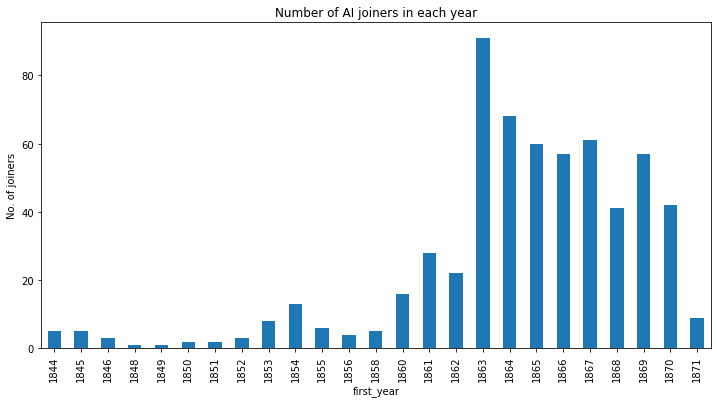

In [45]:
ai.groupby('first_year')['Name'].nunique().plot(kind='bar')
plt.title ("Number of AI joiners in each year")
plt.ylabel ("No. of joiners")
plt.show()

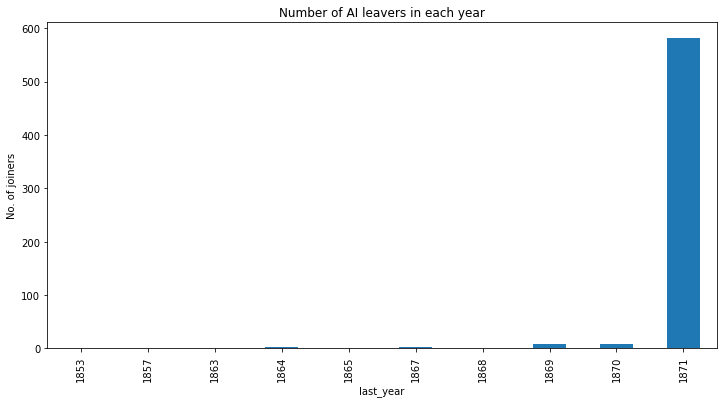

In [46]:
ai.groupby('last_year')['Name'].nunique().plot(kind='bar')
plt.title ("Number of AI leavers in each year")
plt.ylabel ("No. of joiners")
plt.show()

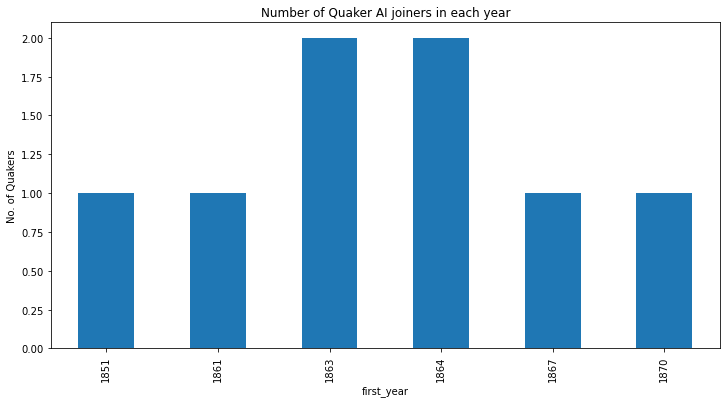

In [47]:
quakers_ai.groupby('first_year')['Name'].nunique().plot(kind='bar')
plt.title ("Number of Quaker AI joiners in each year")
plt.ylabel ("No. of Quakers")
plt.show()

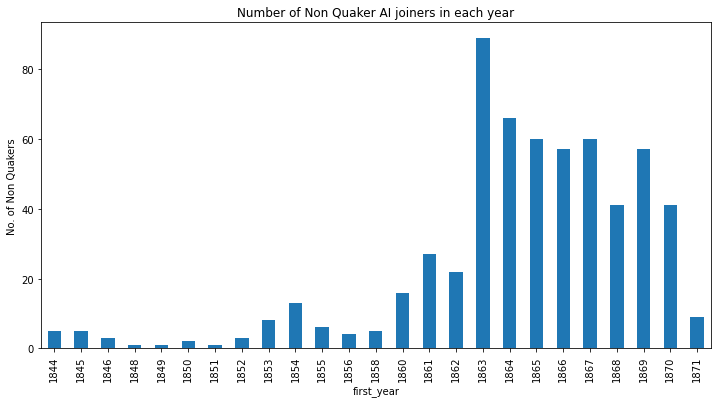

In [48]:
non_quakers_ai.groupby('first_year')['Name'].nunique().plot(kind='bar')
plt.title ("Number of Non Quaker AI joiners in each year")
plt.ylabel ("No. of Non Quakers")
plt.show()

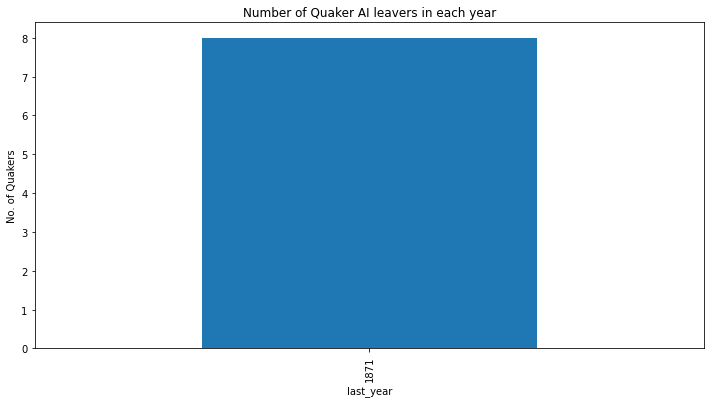

In [49]:
quakers_ai.groupby('last_year')['Name'].nunique().plot(kind='bar')
plt.title ("Number of Quaker AI leavers in each year")
plt.ylabel ("No. of Quakers")
plt.show()

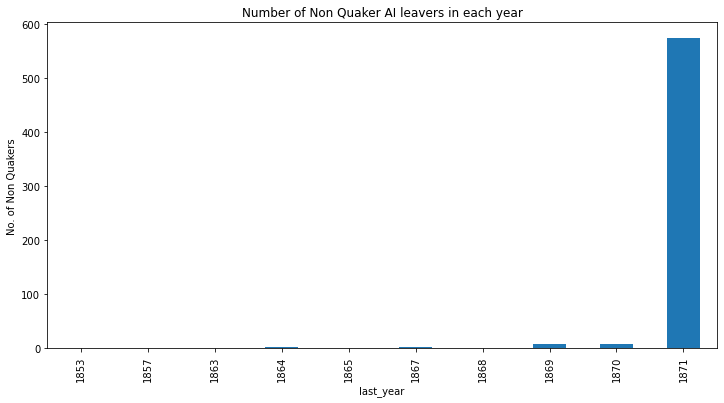

In [50]:
non_quakers_ai.groupby('last_year')['Name'].nunique().plot(kind='bar')
plt.title ("Number of Non Quaker AI leavers in each year")
plt.ylabel ("No. of Non Quakers")
plt.show()

# The following code cells make a dynamic bigraph gexf output file of all CEDA data for Gephi #

### Goto Gephi and open project ceda_dynamic_edges.gexf ###

## This visualistaion shows all edges dynamically, to see all nodes visualised dynamically go to: ##

In [51]:
with open('vw_2_ceda_with_attributes_202108091312.csv', 'r') as nodecsv: # Open the Nodes csv file
    nodereader = csv.reader(nodecsv) # Read the csv
    nodes = [n for n in nodereader][1:]# Retrieve the data (using Python list comprhension and list slicing
                                       # to remove the header row
    node_names = [n[0] for n in nodes] # Get a list of only the node names

with open('vw_4_ceda_membership_dates_xid_202108091147.csv', 'r') as edgecsv: # Open the file
    edgereader = csv.reader(edgecsv) # Read the csv
    edge_list = list(edgereader) # Convert to list, so can iterate below in for loop
    
    # Create empty arrays to store edge data and edge attribute data
    edges = []
    edges_attributes = []
    
    # Fill the arrays with data from CSV
    for e in edge_list[1:]:
        edges.append(tuple(e[0:2])) # Get the first 2 columns (source, target) and add to array
        edges_attributes.append(tuple(e[2:4])) # Get the 3rd and 4th columns (first_year, last_year) and add to array
    
edge_names = [e[0] for e in edges] # Get a list of only the edge names   


In [52]:
print("Nodes length: ", len(node_names))
print("Edges length: ", len(edges))
print("Edges attributes length: ", len(edges_attributes)) # This should be the same length as edges


Nodes length:  3095
Edges length:  3894
Edges attributes length:  3894


In [53]:
print("First 5 nodes:", node_names[0:5])
print("First 5 edges:", edges[0:5])
print("First 5 edges attributes:", edges_attributes[0:5])

# The output will appear below this code cell.


First 5 nodes: ['Arthur William A Beckett', 'Andrew Mercer Adam', 'H R Adam', 'William Adam', 'Henry John Adams']
First 5 edges: [('William Adam', 'ESL'), ('William (1) Adams', 'ESL'), ('William (2) Adams', 'ESL'), ('Louis Agassiz', 'ESL'), ('Augustine Aglio', 'ESL')]
First 5 edges attributes: [('1844', '1844'), ('1844', '1844'), ('1858', '1871'), ('1860', '1871'), ('1843', '1845')]


In [54]:
G = nx.Graph()
G.add_nodes_from(node_names)
G.add_edges_from(edges)
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 3100
Number of edges: 3894
Average degree:   2.5123


In [55]:
# Nodes

birth_year_dict = {}
death_year_dict = {}
religion_id_dict = {}

# Edges
first_year_dict = {}
last_year_dict = {}

In [56]:
for node in nodes: # Loop through the list, one row at a time
    
    birth_year_dict [node[0]] = node[1]
    death_year_dict [node[0]] = node[2]
    religion_id_dict[node[0]] = node[3]
    
   

In [57]:
for i, edge in enumerate(edges): # Loop through the list, one row at a time
    first_year_dict [(edge[0], edge[1])] = edges_attributes[i][0]
    last_year_dict [(edge[0], edge[1])] = edges_attributes[i][1]

In [58]:
#print(religion_id_dict)# list Source, target and first_year (all records). This shows the data that will be exported to Gephi.
#print(len(religion_id_dict))# At the end of the file print a count of all first_year check 3946)
#print (religion_id_dict)

In [59]:
# Nodes
nx.set_node_attributes(G, birth_year_dict, 'birth_year')
nx.set_node_attributes(G, death_year_dict, 'death_year')
nx.set_node_attributes(G, religion_id_dict, 'religion_id')

# Edges
nx.set_edge_attributes(G, first_year_dict, 'first_year')
nx.set_edge_attributes(G, last_year_dict, 'last_year')

In [60]:
#for n in G.nodes(): # Loop through every node, in our data "n" will be the name of the person
#print(n, G.nodes[n]['birth_year']) # Access every node by its name, and then by the attribute "birth_year"

In [61]:
nx.write_gexf(G, 'ceda_all_data_dyn_edges.gexf')


# END #